# Identifying Missing or Null Values...

In [92]:
import pandas as pd

# Sample data with missing values
data = {'Name': ['John', 'Anna', 'Mike', 'Sara'],
        'Age': [28, 22, None, 25],
        'City': ['New York', None, 'London', 'Paris']}

df = pd.DataFrame(data)
df


,Name,Age,City
0,John,28.0,New York
1,Anna,22.0,None
2,Mike,NaN,London
3,Sara,25.0,Paris


In [93]:
# Check for missing values
df.isnull().sum()

Name    0
Age     1
City    1
dtype: int64

In [94]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)

C:\Users\arman\AppData\Local\Temp\ipykernel_14132\3583834766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\arman\AppData\Local\Temp\ipykernel_14132\3583834766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [95]:
df

,Name,Age,City
0,John,28.0,New York
1,Anna,22.0,London
2,Mike,25.0,London
3,Sara,25.0,Paris


# Identifying Duplicates

In [97]:
# Sample data with duplicates
data = {'Name': ['John', 'Anna', 'Mike', 'John', 'Anna'],
        'Age': [28, 22, 30, 28, 22],
        'City': ['New York', 'Paris', 'London', 'New York', 'Paris']}

df = pd.DataFrame(data)

df


,Name,Age,City
0,John,28,New York
1,Anna,22,Paris
2,Mike,30,London
3,John,28,New York
4,Anna,22,Paris


In [98]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [99]:
df.drop_duplicates()

,Name,Age,City
0,John,28,New York
1,Anna,22,Paris
2,Mike,30,London


# Identifying Outliers

In [101]:
from scipy.stats import zscore

# Sample data with outliers
data = {'Age': [25, 30, 35, 1000, 40, 45, 50, 2000]}
df = pd.DataFrame(data)
df


,Age
0,25
1,30
2,35
3,1000
4,40
5,45
6,50
7,2000


<Axes: xlabel='Age'>

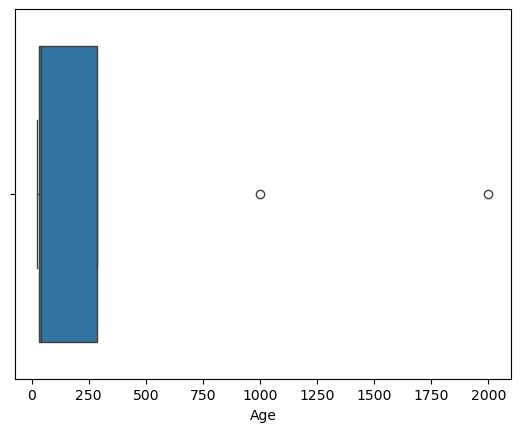

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Age", data=df)

In [103]:
df.shape

(8, 1)

In [104]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

IQR = q3 - q1

In [105]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

min_range , max_range

(-346.875, 668.125)

In [106]:
new_data = df[df["Age"]<=max_range]
new_data.shape

(6, 1)

<Axes: xlabel='Age'>

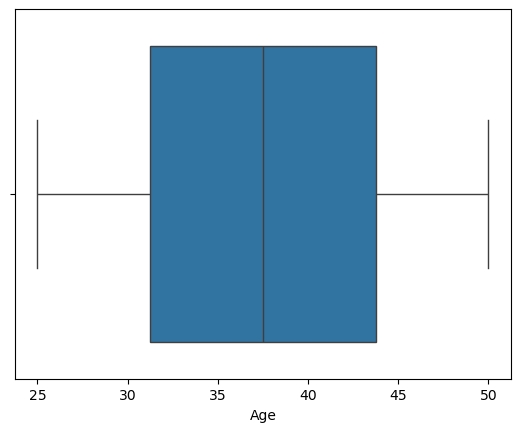

In [107]:
sns.boxplot(x="Age", data=new_data)

In [108]:
new_data

,Age
0,25
1,30
2,35
4,40
5,45
6,50


In [109]:
z_score = (df["Age"] - df["Age"].mean()) / (df["Age"].std())
z_score

0   -0.519479
1   -0.512610
2   -0.505741
3    0.820004
4   -0.498871
5   -0.492002
6   -0.485133
7    2.193832
Name: Age, dtype: float64

In [110]:
df["z_score"] = z_score
df.head(8)

,Age,z_score
0,25,-0.519479
1,30,-0.512610
2,35,-0.505741
3,1000,0.820004
4,40,-0.498871
5,45,-0.492002
6,50,-0.485133
7,2000,2.193832


In [111]:
df[df["z_score"]<3]

,Age,z_score
0,25,-0.519479
1,30,-0.512610
2,35,-0.505741
3,1000,0.820004
4,40,-0.498871
5,45,-0.492002
6,50,-0.485133
7,2000,2.193832


In [148]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler

In [152]:
mc = MinMaxScaler()
mc.fit(new_data[['Age']])

MinMaxScaler()

In [154]:
new_data['Age_min'] = mc.transform(new_data[['Age']])

C:\Users\arman\AppData\Local\Temp\ipykernel_14132\2915821841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Age_min'] = mc.transform(new_data[['Age']])


In [156]:
new_data

,Age,Age_min
0,25,0.0
1,30,0.2
2,35,0.4
4,40,0.6
5,45,0.8
6,50,1.0


C:\Users\arman\AppData\Local\Temp\ipykernel_14132\2639943738.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["Age"])
C:\Users\arman\AppData\Local\Temp\ipykernel_14132\2639943738.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["Age_min"])


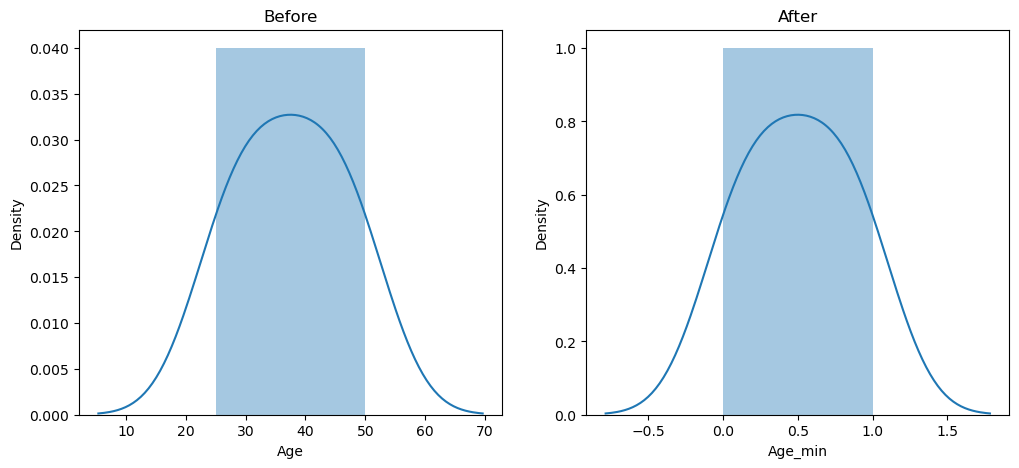

In [158]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(new_data["Age"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(new_data["Age_min"])
plt.show()

# Range/Domain Errors

In [113]:
# Sample data with invalid age
import pandas as pd

data = {'Name': ['John', 'Anna', 'Mike', 'Sara'],
        'Age': [28, -5, 30, 250]}

df = pd.DataFrame(data)

# Check for invalid ages (negative or > 120)
invalid_ages = df[(df['Age'] < 0) | (df['Age'] > 120)]

print("Invalid ages:")
print(invalid_ages)


Invalid ages:
   Name  Age
1  Anna   -5
3  Sara  250


# How many repeated data in a particular columns...

In [115]:
# Sample data with inconsistent categorical values
data = {'Gender': ['Male', 'Female', 'male', 'Female', 'MALE']}
df = pd.DataFrame(data)
df


,Gender
0,Male
1,Female
2,male
3,Female
4,MALE


In [116]:
# Check for inconsistent categorical values
inconsistent_genders = df['Gender'].value_counts()
print("Inconsistent categorical values in 'Gender' column:")
print(inconsistent_genders)

Inconsistent categorical values in 'Gender' column:
Gender
Female    2
Male      1
male      1
MALE      1
Name: count, dtype: int64


# Identifying Formatting Errors

In [118]:
# Sample data with date format inconsistency
data = {'Name': ['John', 'Anna', 'Mike'],
        'DOB': ['12/25/1990', '1991-04-15', '15-05-1992']}
df = pd.DataFrame(data)

df


,Name,DOB
0,John,12/25/1990
1,Anna,1991-04-15
2,Mike,15-05-1992


In [119]:
# Check if dates are consistent (e.g., check if all dates are in the same format)
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Any 'NaT' (Not a Time) indicates a formatting error
invalid_dates = df[df['DOB'].isna()]

print("Invalid date formats:")
print(invalid_dates)

Invalid date formats:
   Name DOB
1  Anna NaT
2  Mike NaT


# Inconsistent Data Types

In [121]:
# Sample data with inconsistent data types
data = {'Price': [100, 200, '300', 400, 'five hundred']}
df = pd.DataFrame(data)

df


,Price
0,100
1,200
2,300
3,400
4,five hundred


In [160]:
# Check for non-numeric values in a column
non_numeric_price = df[~df['Price'].apply(lambda x: isinstance(x, (int, float)))]

print("Non-numeric values in 'Price' column:")
print(non_numeric_price)

Non-numeric values in 'Price' column:
          Price
2           300
4  five hundred


# Split the Data into Separate Columns

In [163]:
import pandas as pd

# Sample data
data = {
    'Product Info': [
        'Apple iPhone 13 - ₹69999 - Electronics - 2023-11-01',
        'Samsung Galaxy S21 - ₹54999 - Electronics - 2023-10-25',
        'Sony Headphones - ₹7999 - Accessories - 2023-11-10'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Show initial DataFrame
df


,Product Info
0,Apple iPhone 13 - ₹69999 - Electronics - 2023-...
1,Samsung Galaxy S21 - ₹54999 - Electronics - 20...
2,Sony Headphones - ₹7999 - Accessories - 2023-1...


In [165]:
# Split the 'Product Info' column
df[['Product Name', 'Price', 'Category', 'Date Added']] = df['Product Info'].str.split(' - ', expand=True)

# Clean up Price (remove ₹ symbol and convert to numeric)
df['Price'] = df['Price'].str.replace('₹', '').astype(int)

# Convert 'Date Added' to datetime format
df['Date Added'] = pd.to_datetime(df['Date Added'])

# Show the result
df


,Product Info,Product Name,Price,Category,Date Added
0,Apple iPhone 13 - ₹69999 - Electronics - 2023-...,Apple iPhone 13,69999,Electronics,2023-11-01
1,Samsung Galaxy S21 - ₹54999 - Electronics - 20...,Samsung Galaxy S21,54999,Electronics,2023-10-25
2,Sony Headphones - ₹7999 - Accessories - 2023-1...,Sony Headphones,7999,Accessories,2023-11-10


# create a scripts to standardize text formatting ( e . g, remove spacial character , lowercase) in a data set

In [172]:
import re

# Sample dataset
data = {
    'Review': [
        "Mujhe yeh product #awesome lagta hai!", 
        "Bohat *accha* hai!!!", 
        "Worst purchase ever, do not buy!!! :-(", 
        "Ye product sab se best hai @#₹"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

df


,Review
0,Mujhe yeh product #awesome lagta hai!
1,Bohat *accha* hai!!!
2,"Worst purchase ever, do not buy!!! :-("
3,Ye product sab se best hai @#₹


In [186]:
# Function to clean and standardize text
def standardize_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and digits (keeping only alphabets and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    text = text.replace('accha', 'achha')  # Example: replace variant spelling of "accha"
    
    return text

# Apply the function to the 'Review' column
df['Cleaned Review'] = df['Review'].apply(standardize_text)

# Show the result
df

,Review,Cleaned Review
0,Mujhe yeh product #awesome lagta hai!,mujhe yeh product awesome lagta hai
1,Bohat *accha* hai!!!,bohat achha hai
2,"Worst purchase ever, do not buy!!! :-(",worst purchase ever do not buy
3,Ye product sab se best hai @#₹,ye product sab se best hai


# ( e.g., "Male" vs "male").

In [189]:
import pandas as pd

# Sample dataset with inconsistent labels
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Gender': ['Male', 'male', 'Female', 'female', 'Female', 'male', 'Male']
}

# Create DataFrame
df = pd.DataFrame(data)

df


,Name,Gender
0,Alice,Male
1,Bob,male
2,Charlie,Female
3,David,female
4,Eve,Female
5,Frank,male
6,Grace,Male


In [197]:
# Step 4: Standardize the labels (convert them back to consistent format)
df['Gender'] = df['Gender'].replace({'male': 'Male', 'female': 'Female'})
    
df

,Name,Gender
0,Alice,Male
1,Bob,Male
2,Charlie,Female
3,David,Female
4,Eve,Female
5,Frank,Male
6,Grace,Male


# split a dataset into train and test sets while handling missing data separately for each

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Sample DataFrame with missing values
data = {
    'Feature1': [1, 2, 3, 4, None, 6],
    'Feature2': [7, None, 9, 10, 11, 12],
    'Target': [1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

df


,Feature1,Feature2,Target
0,1.0,7.0,1
1,2.0,NaN,0
2,3.0,9.0,1
3,4.0,10.0,0
4,NaN,11.0,1
5,6.0,12.0,0


In [17]:
# Step 1: Split the data into features (X) and target (y)
X = df.drop('Target', axis=1)  # Features
y = df['Target']               # Target

In [5]:
# Step 2: Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 3: Handle missing data separately for train and test sets

# For training set
imputer = SimpleImputer(strategy='mean')  # Filling missing values with mean of the column
X_train_imputed = imputer.fit_transform(X_train)  # Fit and transform on training data

# For test set (use the same imputer, do not fit again, just transform)
X_test_imputed = imputer.transform(X_test)  # Only transform on test data (using train's statistics)

In [9]:
# Convert imputed arrays back to DataFrame for easy reading
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X.columns)

# Display the results
print("Train Set after Imputation:")
print(X_train_imputed_df)
# X_train_imputed_df
print("\nTest Set after Imputation:")
print(X_test_imputed_df)
# X_test_imputed_df

Train Set after Imputation:
   Feature1  Feature2
0  6.000000      12.0
1  3.000000       9.0
2  4.333333      11.0
3  4.000000      10.0

Test Set after Imputation:
   Feature1  Feature2
0       1.0       7.0
1       2.0      10.5
